<a href="https://colab.research.google.com/github/aunz/Insight-Data-Science-Challenge/blob/master/Happy_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!curl -o data.zip https://raw.githubusercontent.com/aunz/Insight-Data-Science-Challenge/master/happy_hotel.zip
!unzip -qq data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.3M  100 11.3M    0     0  81.9M      0 --:--:-- --:--:-- --:--:-- 82.5M


In [0]:
df1 = pd.read_csv('hotel_happy_reviews.csv')
df2 = pd.read_csv('hotel_not_happy_reviews.csv')

In [15]:
print(df1.info())
df1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26521 entries, 0 to 26520
Data columns (total 4 columns):
User_ID        26521 non-null object
Description    26521 non-null object
Is_Response    26521 non-null object
hotel_ID       26521 non-null int64
dtypes: int64(1), object(3)
memory usage: 828.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
1717,id12861,We just returned from our -rd. visit to Royal ...,happy,1
3526,id15514,I have stayed now a few times at this location...,happy,8
9243,id23956,We stayed at this hotel for a week; the staff ...,happy,1
23881,id45392,The older hotel was nicely furnished. Our room...,happy,3
14008,id30874,This HI Exp was in line with all the other Hol...,happy,4


In [17]:
print(df2.info())
df2.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        12411 non-null object
Description    12411 non-null object
Is_Response    12411 non-null object
hotel_ID       12411 non-null int64
dtypes: int64(1), object(3)
memory usage: 387.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
3616,id21568,The property was clean and the desk and bell s...,not happy,5
5462,id27377,"I stayed here for one night on January --th, -...",not happy,10
4324,id23745,We were not very happy with this hotel and wou...,not happy,4
3075,id19829,We used the park and fly pkg. for our trip to ...,not happy,3
2128,id16891,We stayed at this hotel for one night during t...,not happy,4


In [30]:
# number of unique user
len(set(df1.User_ID.unique().tolist() + df2.User_ID.unique().tolist()))

38932

In [0]:
# change the Is_response to 1: happy, 0: unhappy
df1.Is_Response = 1
df2.Is_Response = 0

# drop user_id as it's not important
df1 = df1.drop('User_ID', 1)
df2 = df2.drop('User_ID', 1)

In [0]:
# strip white space
df1.Description = df1.Description.str.strip()
df2.Description = df2.Description.str.strip()

In [73]:
# number of words
tmp = df1.Description.str.split().apply(len)
print(tmp.describe())


tmp = df2.Description.str.split().apply(len)
print(tmp.describe())

tmp = df1.Description.str.len()
print(tmp.describe())

tmp = df2.Description.str.len()
print(tmp.describe())

count    26521.000000
mean       142.015912
std        117.225847
min          4.000000
25%         66.000000
50%        111.000000
75%        180.000000
max       1780.000000
Name: Description, dtype: float64
count    12411.000000
mean       190.109661
std        151.458119
min          5.000000
25%         92.000000
50%        151.000000
75%        239.500000
max       2289.000000
Name: Description, dtype: float64
count    26521.000000
mean       786.122997
std        645.734294
min         20.000000
25%        368.000000
50%        616.000000
75%        991.000000
max      10482.000000
Name: Description, dtype: float64
count    12411.000000
mean      1042.553864
std        833.261081
min         30.000000
25%        507.000000
50%        827.000000
75%       1308.000000
max      14340.000000
Name: Description, dtype: float64


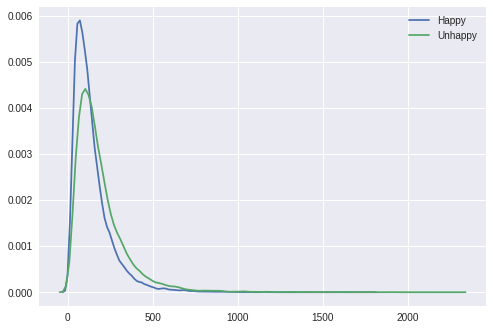

In [81]:
ax = sns.kdeplot(df1.Description.str.split().apply(len), label='Happy')
sns.kdeplot(df2.Description.str.split().apply(len), label='Unhappy');

In [44]:
tmp = 'adfasdf'
tmp.strip()

'adfasdf'